# CPSC380: 2_numpy_7_FancyIndexing

In this notebook, you will learn:
 - Fancy indexing 
 - Example: Selecting random points
 
Read more: 
 - textbook (https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) and
 - [Numpy website] (https://numpy.org/).

In [1]:
import numpy as np

## 1 Fancy indexing

In [2]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [3]:
print ([x[3], x[7], x[2]])

ind = [3, 7, 4] #equivalently
print(x[ind])

[71, 86, 14]
[71 86 60]


### 1.1 Shape of the result 

It reflects the shape of the *index arrays* rather than the shape of the *array being indexed*

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions. Consider the following array:

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
# the first index refers to the row, and the second to the column:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

### 1.2 Broadcasting

The pairing of indices in fancy indexing follows all the broadcasting rules.

In [7]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations.
For example:

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

### 1.3 Combined Indexing

In [9]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [11]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

### 1.4 Combined fancy indexing with masking

In [12]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## 2. Example: Selecting Random Points

In [13]:
#  Generating points with two-dimensional normal distribution
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 50)
X.shape

(50, 2)

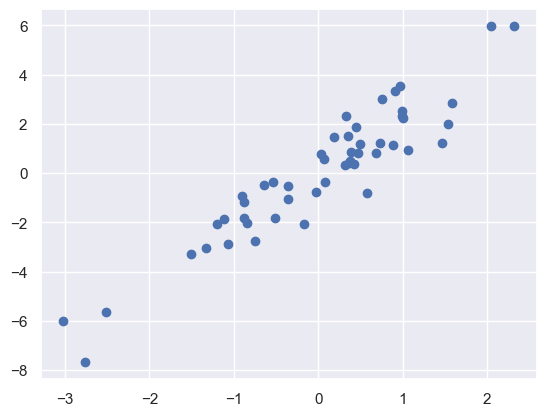

In [14]:
# generate scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [15]:
# choosing 20 random indices with no repeats
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 8, 14, 20, 19, 30, 21,  0,  2, 39, 37, 18,  4, 11,  6,  5, 29, 43,
       28, 42, 36])

In [16]:
# choose 20 points based on fancy indices
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

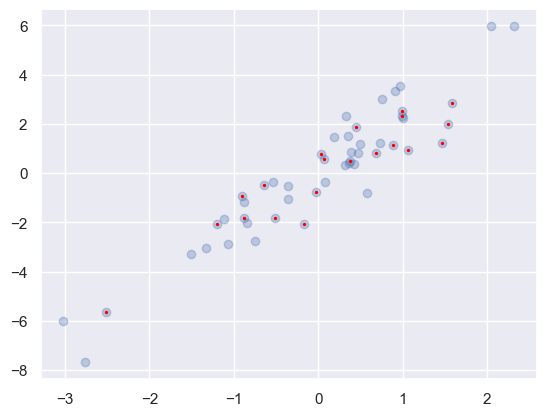

In [17]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=2);

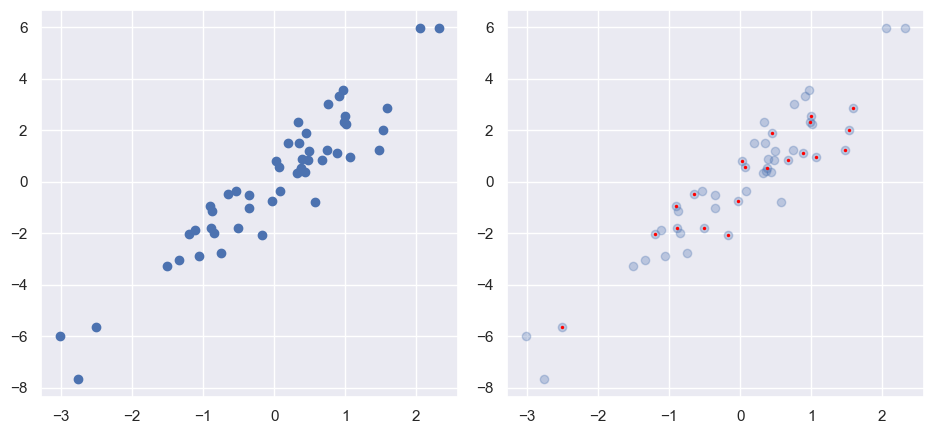

In [18]:
# view plots side-by-side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9.5, 4.5))

# left one
axes[0].scatter(X[:, 0], X[:, 1]);

# right one
axes[1].scatter(X[:, 0], X[:, 1], alpha=0.3)
axes[1].scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=2);
fig.tight_layout()